In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import pickle
from pathlib import Path
import os
import matplotlib.pyplot as plt
import time

In [4]:
THRESHOLD = 20
K = 5
OUTPUT_FILENAME = 'periods.npy'
CUR_PATH = os.path.abspath('') #os.path.realpath(os.path.join(os.getcwd(), os.path.dirname(__file__)))
output_file = (os.path.join(CUR_PATH, OUTPUT_FILENAME))

In [15]:
mod_path = Path(CUR_PATH)
relative_path = '../../data/raw.csv'
DATA_PATH = (mod_path / relative_path).resolve()  # 'data/raw.csv'
print(DATA_PATH)
colnames = ['time', 'can', 'id', 'dlc', 'payload']
dataset = pd.read_csv(DATA_PATH, names=colnames, header=None)

/home/tommaso/Desktop/IDS/data/raw.csv


In [18]:
id_periods = dict()
id = '0DE'
id_packets = dataset.loc[dataset['id'] == id]
print(id_packets.shape)
times_of_arrival = id_packets['time'].to_numpy()
periods = np.diff(times_of_arrival)
print(periods)

(116148, 5)
[0.0102191  0.00985408 0.01045489 ... 0.01003599 0.00971985 0.01024914]


In [19]:
def compute_range(k: int, periods: np.array):
    avg = periods.mean()
    sigma = periods.std()
    range_min = avg - k*sigma
    range_max = avg + k*sigma
    return range_min,range_max

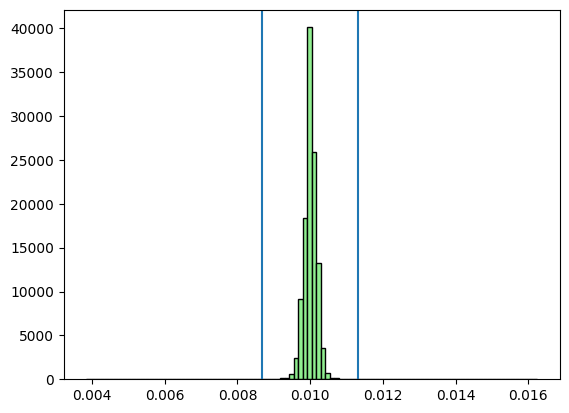

In [21]:
plt.hist(periods, color='lightgreen', ec='black', bins=100)
r_min, r_max = compute_range(K, periods)
plt.axvline(r_min, 0, 1, label='min')
plt.axvline(r_max, 0, 1, label='max')
plt.show()

In [9]:
s1 = '011'
s2 = '010'
print(sum(xor(s1,s2)))

NameError: name 'xor' is not defined

In [13]:
from hexhamming import hamming_distance_string
import time

def hamming(s1, s2):
    assert len(s1) == len(s2)
    return bin(int(s1,2)^int(s2,2)).count('1')

s1 = '01111100'
s2 = '01000110'

start_time = time.time()
print(hamming_distance_string(s1, s2))
print("--- %s seconds ---" % (time.time() - start_time))
time1 = time.time() - start_time

start_time = time.time()
print(hamming(s1, s2))
print("--- %s seconds ---" % (time.time() - start_time))
time2 = time.time() - start_time

print(time2 - time1)

4
--- 0.00012373924255371094 seconds ---
4
--- 3.647804260253906e-05 seconds ---
-8.940696716308594e-05


In [2]:
import numpy as np

a1 = np.array(['000','100', '111'])

result = np.diff(a1)
print(result)

UFuncTypeError: ufunc 'subtract' did not contain a loop with signature matching types (dtype('<U3'), dtype('<U3')) -> None

In [4]:
class Solution(object):
    def hammingDistance(self, x, y):
        """
        :type x: int
        :type y: int
        :rtype: int
        ""
        return str(bin(x^y)).count('1')

Solution.hammingDistance(2,3,4)

0b111


3

In [8]:
print(bin(int('011',2)^int('100',2)).count('1'))

3


['0' '1' '10' '11' '100' '101' '110' '111' '1000' '1001']


random for now: 100%|██████████| 255/255 [00:00<00:00, 929.41it/s] 


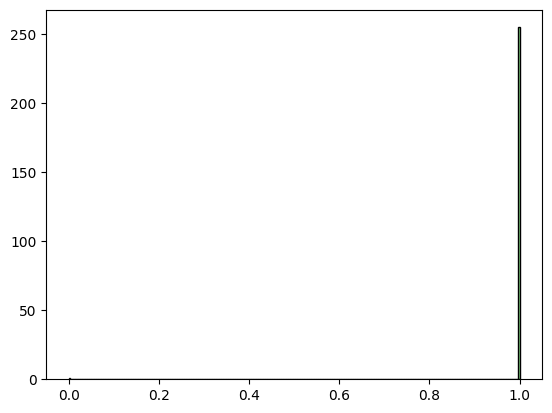

In [17]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

payloads = np.array([format(i, 'b') for i in range(255)])


print(payloads[:10])

distribution = np.zeros(2**8)
# payloads = dataset['payload'].to_numpy()
for payload in (pbar := tqdm(payloads)):
    pbar.set_description('random for now')
    # single_bytes = split_string(payload)
    #for byte in single_bytes:
    distribution[int(payload,2)] += 1
plt.hist(distribution, color='lightgreen', ec='black', bins=256)
plt.show()    

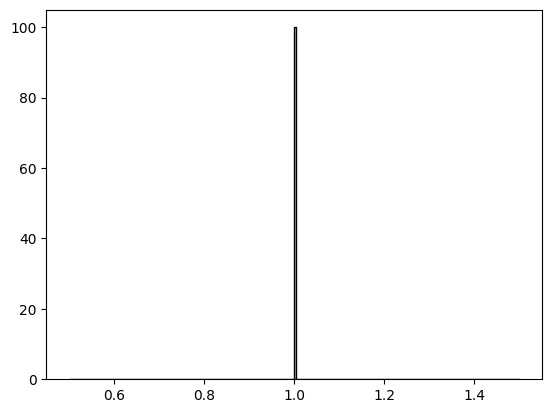

In [18]:
distribution = np.array([1 for i in range(100)])
plt.hist(distribution, color='lightgreen', ec='black', bins=256)
plt.show() 